# Latar Belakang

Tranjakarta adalah sebuah perusahaan yang bergerak dibidang jasa transportasi publik,perusahaan ini ingin meningkatkan tingkat pelayanan yang baik kepada pengguna tranjakarta, namun tantangannya masih banyak yang harus dibenahi terutama, tingkat padatnya penumpang transjakarta yang meningkat imbas dari pesatnya pertumbuhan penduduk kota jakarta dan sekitarnya.   





# Rumusan Masalah 

Perusahaan Transjakrta ini ingin mengetahui bagaimana tingkat kepadatan yang ada di Halte dan Corridor yang tersebar di seluruh kota jakarta dan kota sekitarnya, guna informasi ini untuk mengetahui daerah mana saja yang memiliki kepadatan tertinggi dan terendah, dengan mengetahui ini perushaan bisa memutuskan berbagai strategi unutk menanggulangi permasalahan ini dan akan berimplikasi pada tikat kenyamanan publi transportasi, sehingga jika ini tercapai akan bisa meningkatkan jummlah penduduk jakarta untuk dapat menggunakan trasportasi publik.


Bagaimana mengatasi masalah kapasitas dan kepadatan penumpang pada beberapa rute dan armada selama jam-jam sibuk, dengan melihat hubungannya terhadap beberapa parameter yang terkait?









# Data
Berikut adalah data yang terkumpul dari Database perusahaan yang akan digunakan untuk menjawab masalah yang ada diatas.

In [482]:
import numpy as np
import pandas as pd
import warnings

import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

Dataset ini berisi terkait penumpang Transjakrta, dari alur penumpanng, nama corridor transjakart,halte dan juga waktu dimana pengguna transjarta menggunakan trasportasi Transjakarta, dataset ini terdapat 12 kolom yaitu:


- transID: Unique transaction id for every transaction
- payCardID: Customers main identifier. The card customers use as a  
  ticket for entrance and exit.
- payCardBank: Customers card bank issuer name
- payCardName: Customers name that is embedded in the card.
- payCardSex: Customers sex that is embedded in the card
- payCardBirthDate: Customers birth year
- corridorID: Corridor ID / Route ID as key for route grouping.
- corridorName: Corridor Name / Route Name contains Start and Finish 
  for each route.
- direction: 0 for Go, 1 for Back. Direction of the route.
- tapInStops: Tap In (entrance) Stops ID for identifying stops name
- tapInStopsName: Tap In (entrance) Stops Name where customers tap in.
- tapInStopsLat: Latitude of Tap In Stops
- tapInStopsLon: Longitude of Tap In Stops
- stopStartSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related - direction.
- tapInTime: Time of tap in. Date and time
- tapOutStops: Tap Out (Exit) Stops ID for identifying stops name
- tapOutStopsName: Tap out (exit) Stops Name where customers tap out.
- tapOutStopsLat: Latitude of Tap Out Stops
- tapOutStopsLon: Longitude of Tap Out Stops
- stopEndSeq: Sequence of the stops, 1st stop, 2nd stops etc. Related 
  to direction.
- tapOutTime: Time of tap out. Date and time
- payAmount: The number of what customers pay. Some are free. Some not.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.csv


In [483]:
df1=pd.read_csv('Transjakarta.csv')
df1.head(5)

transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB  180062659848800   emoney      Bajragin Usada   M           
1  LGXO740D2N47GZ  4885331907664776  dki         Gandi Widodo     F           
2  DJWR385V2U57TO  4996225095064169  dki         Emong Wastuti    F           
3  JTUZ800U7C86EH  639099174703      flazz       Surya Wacana     F           
4  VMLO535V7F95NJ  570928206772      flazz       Embuh Mardhiyah  M           

   payCardBirthDate corridorID                              corridorName  \
0  2008              5          Matraman Baru - Ancol                      
1  1997              6C         Stasiun Tebet - Karet via Patra Kuningan   
2  1992              R1A        Pantai Maju - Kota                         
3  1978              11D        Pulo Gebang - Pulo Gadung 2 via PIK        
4  1982              12         Tanjung Priok - Pluit                      

   direction tapInStops  ... tapInStopsLon  stopStartSeq            tapInTime  \
0 1.000       P00142     ... 106.844        7             2023-04-03 05:21:44   
1 0.000       B01963P    ... 106.833        13            2023-04-03 05:42:44   
2 0.000       B00499P    ... 106.814        38            2023-04-03 05:59:06   
3 0.000       B05587P    ... 106.935        23            2023-04-03 05:44:51   
4 0.000       P00239     ... 106.889        5             2023-04-03 06:17:35   

   tapOutStops        tapOutStopsName tapOutStopsLat tapOutStopsLon  \
0  P00253       Tegalan               -6.203         106.857          
1  B03307P      Sampoerna Strategic   -6.217         106.819          
2  B04962P      Simpang Kunir Kemukus -6.134         106.815          
3  B03090P      Raya Penggilingan     -6.183         106.932          
4  P00098       Kali Besar Barat      -6.135         106.811          

   stopEndSeq           tapOutTime  payAmount  
0 12.000       2023-04-03 06:00:53 3500.000    
1 21.000       2023-04-03 06:40:01 3500.000    
2 39.000       2023-04-03 06:50:55 3500.000    
3 29.000       2023-04-03 06:28:16 3500.000    
4 15.000       2023-04-03 06:57:03 3500.000    

[5 rows x 22 columns]

In [484]:
df1.tail(5)

transID            payCardID payCardBank  \
37895  ZWEC949B8Q87QG  4685818286724028395  brizzi       
37896  YHHK837P6Y95GN  6502902290603767     dki          
37897  YXPP627N4G95HO  213159426675861      emoney       
37898  RGVK175U2U98UV  377840859133591      emoney       
37899  FMZZ963S4B68ZP  501862539795         flazz        

                  payCardName payCardSex  payCardBirthDate corridorID  \
37895  Kamila Mahendra         F          2004              6B          
37896  Titi Siregar            M          1974              9N          
37897  drg. Zahra Nashiruddin  F          1976              1T          
37898  Ana Agustina            M          1976              JAK.13      
37899  drg. Leo Najmudin       F          1985              13          

                            corridorName  direction tapInStops  ...  \
37895  Ragunan - MH Thamrin via Semanggi 1.000       P00261     ...   
37896  Pinang Ranti - Pramuka            1.000       P00064     ...   
37897  Cibubur - Balai Kota              1.000       B02873P    ...   
37898  Tanah Abang - Jembatan Lima       1.000       B02505P    ...   
37899  Ciledug - Tendean                 0.000       P00001     ...   

      tapInStopsLon  stopStartSeq            tapInTime  tapOutStops  \
37895 106.823        2             2023-04-21 18:18:37  P00228        
37896 106.881        1             2023-04-18 21:52:31  P00179        
37897 106.817        12            2023-04-04 10:29:47  B00226P       
37898 106.810        33            2023-04-15 19:59:26  B01787P       
37899 106.748        2             2023-04-12 21:08:12  P00106        

       tapOutStopsName tapOutStopsLat tapOutStopsLon  stopEndSeq  \
37895  SMK 57          -6.291         106.824        13.000        
37896  Pinang Ranti    -6.291         106.886        2.000         
37897  Buperta Cibubur -6.370         106.896        14.000        
37898  JPO Blok G      -6.189         106.811        34.000        
37899  Kebayoran Lama  -6.238         106.778        7.000         

                tapOutTime  payAmount  
37895  2023-04-21 19:55:49 3500.000    
37896  2023-04-18 22:28:22 3500.000    
37897  2023-04-04 13:27:25 20000.000   
37898  2023-04-15 20:27:50 0.000       
37899  2023-04-12 21:34:53 3500.000    

[5 rows x 22 columns]

# Pemahaman dan Pembersihan Data
Sebelum melangkah ke analisis, penting bagi kita untuk lebih memahami dataset pada tahap pemahaman data. Dari proses ini, kita dapat mengidentifikasi berbagai anomali yang mungkin ada dalam dataset kita, yang perlu diatasi selama tahap pembersihan data. Setiap tindakan penanganan anomali akan dijelaskan dengan alasan yang didasarkan pada pengetahuan domain maupun analisis statistik.

In [485]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [486]:
display(df1.describe(), df1.describe(include='object'))

payCardID  payCardBirthDate  direction  tapInStopsLat  \
count 37900.000               37900.000         37900.000  37900.000        
mean  425006029854231744.000  1990.089          0.501      -6.215           
std   1321698663895496704.000 13.051            0.500      0.058            
min   60403675436.000         1946.000          0.000      -6.395           
25%   180044239953466.000     1982.000          0.000      -6.246           
50%   3507946556271373.000    1990.000          1.000      -6.215           
75%   4699023220672919.000    2001.000          1.000      -6.176           
max   4997693930906134528.000 2012.000          1.000      -6.089           

       tapInStopsLon  stopStartSeq  tapOutStopsLat  tapOutStopsLon  \
count 37900.000      37900.000     36556.000       36556.000         
mean  106.842        13.572        -6.215          106.841           
std   0.060          12.238        0.059           0.061             
min   106.615        0.000         -6.395          106.615           
25%   106.803        4.000         -6.247          106.802           
50%   106.835        10.000        -6.215          106.835           
75%   106.882        19.000        -6.175          106.883           
max   107.024        68.000        -6.092          107.024           

       stopEndSeq  payAmount  
count 36556.000   36893.000   
mean  21.220      2699.713    
std   13.801      4212.226    
min   1.000       0.000       
25%   11.000      0.000       
50%   18.000      3500.000    
75%   29.000      3500.000    
max   77.000      20000.000

transID payCardBank         payCardName payCardSex corridorID  \
count   37900           37900       37900               37900      36643       
unique  37900           6           1993                2          221         
top     EIIW227B8L34VB  dki         Fathonah Saefullah  F          1T          
freq    1               18743       80                  20157      400         

                corridorName tapInStops tapInStopsName            tapInTime  \
count   35970                 36687      37900          37900                 
unique  216                   2570       2602           37079                 
top     Cibubur - Balai Kota  P00170     Penjaringan    2023-04-25 06:23:00   
freq    391                   236        243            3                     

       tapOutStops tapOutStopsName           tapOutTime  
count   35611       36556           36556                
unique  2230        2248            35908                
top     P00016      BKN             2023-04-10 19:10:15  
freq    306         316             3

In [487]:
pd.set_option('display.max_colwidth', 1)

list_Item = []
for col in df1.columns :
    list_Item.append ([col, df1[col].nunique(), df1[col].unique()])
    
tabl_1_Desc = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Sample'], 
                         data=list_Item)
tabl_1_Desc

Column Name  Number of Unique  \
0   transID           37900              
1   payCardID         2000               
2   payCardBank       6                  
3   payCardName       1993               
4   payCardSex        2                  
5   payCardBirthDate  67                 
6   corridorID        221                
7   corridorName      216                
8   direction         2                  
9   tapInStops        2570               
10  tapInStopsName    2602               
11  tapInStopsLat     2587               
12  tapInStopsLon     2458               
13  stopStartSeq      67                 
14  tapInTime         37079              
15  tapOutStops       2230               
16  tapOutStopsName   2248               
17  tapOutStopsLat    2237               
18  tapOutStopsLon    2139               
19  stopEndSeq        74                 
20  tapOutTime        35908              
21  payAmount         3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Sample  
0   [EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SB

Secara umum, kita bisa melihat bahwa:












# Missing Value

In [488]:
df1.isna().sum()/df1.shape[0]*100

transID            0.000
payCardID          0.000
payCardBank        0.000
payCardName        0.000
payCardSex         0.000
payCardBirthDate   0.000
corridorID         3.317
corridorName       5.092
direction          0.000
tapInStops         3.201
tapInStopsName     0.000
tapInStopsLat      0.000
tapInStopsLon      0.000
stopStartSeq       0.000
tapInTime          0.000
tapOutStops        6.040
tapOutStopsName    3.546
tapOutStopsLat     3.546
tapOutStopsLon     3.546
stopEndSeq         3.546
tapOutTime         3.546
payAmount          2.657
dtype: float64

<Axes: >

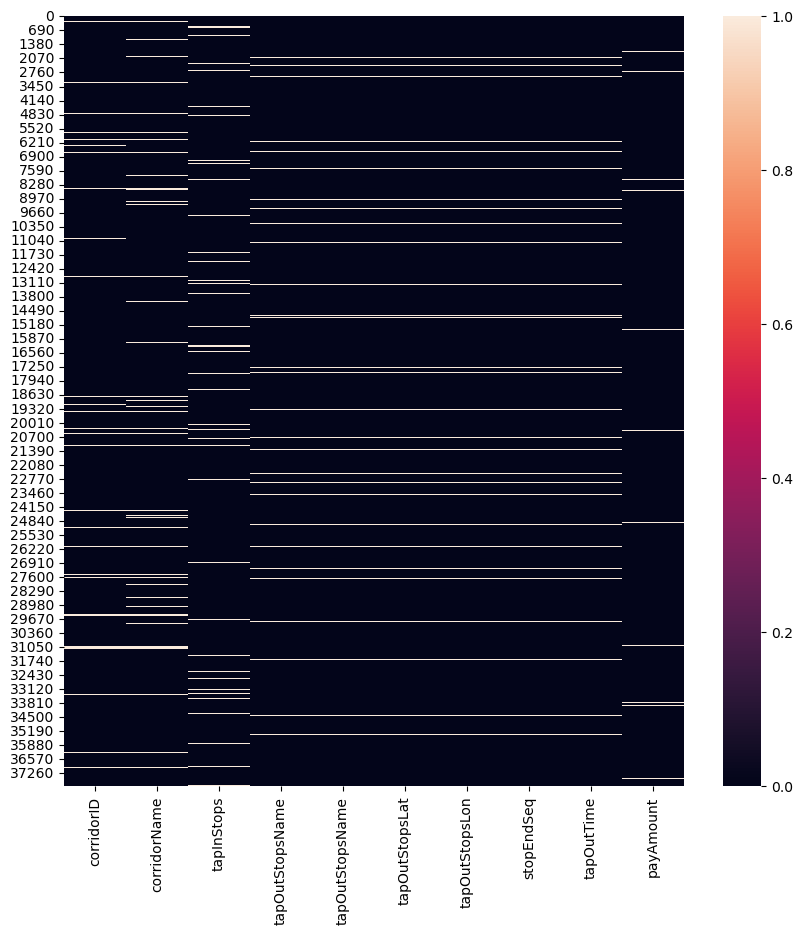

In [461]:
plt.figure(figsize=(10,10))
sns.heatmap(df1[['corridorID','corridorName','tapInStops','tapOutStopsName','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

In [463]:
df1['corridorID'].value_counts().describe()

count   221.000
mean    165.805
std     72.676 
min     15.000 
25%     124.000
50%     156.000
75%     211.000
max     400.000
Name: count, dtype: float64

In [473]:
df1[['corridorID','corridorName']].isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

In [491]:
df1['corridorID_misiing'] = df1['corridorID'].isnull().astype(int)
df1['corridorName_missing'] = df1['corridorName'].isnull().astype(int)
df1

transID            payCardID payCardBank  \
0      EIIW227B8L34VB  180062659848800      emoney       
1      LGXO740D2N47GZ  4885331907664776     dki          
2      DJWR385V2U57TO  4996225095064169     dki          
3      JTUZ800U7C86EH  639099174703         flazz        
4      VMLO535V7F95NJ  570928206772         flazz        
...               ...           ...           ...        
37895  ZWEC949B8Q87QG  4685818286724028395  brizzi       
37896  YHHK837P6Y95GN  6502902290603767     dki          
37897  YXPP627N4G95HO  213159426675861      emoney       
37898  RGVK175U2U98UV  377840859133591      emoney       
37899  FMZZ963S4B68ZP  501862539795         flazz        

                  payCardName payCardSex  payCardBirthDate corridorID  \
0      Bajragin Usada          M          2008              5           
1      Gandi Widodo            F          1997              6C          
2      Emong Wastuti           F          1992              R1A         
3      Surya Wacana            F          1978              11D         
4      Embuh Mardhiyah         M          1982              12          
...                ...        ..           ...              ..          
37895  Kamila Mahendra         F          2004              6B          
37896  Titi Siregar            M          1974              9N          
37897  drg. Zahra Nashiruddin  F          1976              1T          
37898  Ana Agustina            M          1976              JAK.13      
37899  drg. Leo Najmudin       F          1985              13          

                                   corridorName  direction tapInStops  ...  \
0      Matraman Baru - Ancol                    1.000       P00142     ...   
1      Stasiun Tebet - Karet via Patra Kuningan 0.000       B01963P    ...   
2      Pantai Maju - Kota                       0.000       B00499P    ...   
3      Pulo Gebang - Pulo Gadung 2 via PIK      0.000       B05587P    ...   
4      Tanjung Priok - Pluit                    0.000       P00239     ...   
...                      ...                      ...          ...     ...   
37895  Ragunan - MH Thamrin via Semanggi        1.000       P00261     ...   
37896  Pinang Ranti - Pramuka                   1.000       P00064     ...   
37897  Cibubur - Balai Kota                     1.000       B02873P    ...   
37898  Tanah Abang - Jembatan Lima              1.000       B02505P    ...   
37899  Ciledug - Tendean                        0.000       P00001     ...   

                 tapInTime  tapOutStops        tapOutStopsName  \
0      2023-04-03 05:21:44  P00253       Tegalan                 
1      2023-04-03 05:42:44  B03307P      Sampoerna Strategic     
2      2023-04-03 05:59:06  B04962P      Simpang Kunir Kemukus   
3      2023-04-03 05:44:51  B03090P      Raya Penggilingan       
4      2023-04-03 06:17:35  P00098       Kali Besar Barat        
...                    ...     ...                    ...        
37895  2023-04-21 18:18:37  P00228       SMK 57                  
37896  2023-04-18 21:52:31  P00179       Pinang Ranti            
37897  2023-04-04 10:29:47  B00226P      Buperta Cibubur         
37898  2023-04-15 19:59:26  B01787P      JPO Blok G              
37899  2023-04-12 21:08:12  P00106       Kebayoran Lama          

       tapOutStopsLat tapOutStopsLon stopEndSeq           tapOutTime  \
0     -6.203          106.857        12.000      2023-04-03 06:00:53   
1     -6.217          106.819        21.000      2023-04-03 06:40:01   
2     -6.134          106.815        39.000      2023-04-03 06:50:55   
3     -6.183          106.932        29.000      2023-04-03 06:28:16   
4     -6.135          106.811        15.000      2023-04-03 06:57:03   
...      ...              ...           ...                      ...   
37895 -6.291          106.824        13.000      2023-04-21 19:55:49   
37896 -6.291          106.886        2.000       2023-04-18 22:28:22   
37897 -6.370          106.896        14.000      2023-04-04 13

In [481]:
df1.groupby(['corridorID']).describe(include='object')['corridorName']['top']

corridorID
1      Blok M - Kota                                  
10     Tanjung Priok - PGC 2                          
10A    Rusun Marunda - Tanjung Priok                  
10B    Rusun Cipinang Besar Selatan - Penas Kalimalang
10D    Kampung Rambutan - Tanjung Priok               
                     ...                              
S21    Ciputat - CSW                                  
S22    Ciputat - Kampung Rambutan                     
S31    Bintaro - Fatmawati                            
T11    Poris Plawad - Bundaran Senayan                
T21    Palem Semi - Bundaran Senayan                  
Name: top, Length: 221, dtype: object

In [388]:
df1.isna()

transID  payCardID  payCardBank  payCardName  payCardSex  \
0        False      False        False        False       False   
1        False      False        False        False       False   
2        False      False        False        False       False   
3        False      False        False        False       False   
4        False      False        False        False       False   
...        ...        ...          ...          ...         ...   
37895    False      False        False        False       False   
37896    False      False        False        False       False   
37897    False      False        False        False       False   
37898    False      False        False        False       False   
37899    False      False        False        False       False   

       payCardBirthDate  corridorID  corridorName  direction  tapInStops  ...  \
0                 False       False         False      False       False  ...   
1                 False       False         False      False       False  ...   
2                 False       False         False      False       False  ...   
3                 False       False         False      False       False  ...   
4                 False       False         False      False       False  ...   
...                 ...         ...           ...        ...         ...  ...   
37895             False       False         False      False       False  ...   
37896             False       False         False      False       False  ...   
37897             False       False         False      False       False  ...   
37898             False       False         False      False       False  ...   
37899             False       False         False      False       False  ...   

       tapInStopsLon  stopStartSeq  tapInTime  tapOutStops  tapOutStopsName  \
0              False         False      False        False            False   
1              False         False      False        False            False   
2              False         False      False        False            False   
3              False         False      False        False            False   
4              False         False      False        False            False   
...              ...           ...        ...          ...              ...   
37895          False         False      False        False            False   
37896          False         False      False        False            False   
37897          False         False      False        False            False   
37898          False         False      False        False            False   
37899          False         False      False        False            False   

       tapOutStopsLat  tapOutStopsLon  stopEndSeq  tapOutTime  payAmount  
0               False           False       False       False      False  
1               False           False       False       False      False  
2               False           False       False       False      False  
3               False           False       False       False      False  
4               False           False       False       False      False  
...               ...             ...         ...         ...        ...  
37895           False           False       False       False      False  
37896           False           False       False       False      False  
37897           False           False       False       False      False  
37898           False           False       False       False      False  
37899           False           False       False       False      False  

[37900 rows x 22 columns]

In [391]:
df1.dropna(inplace=True)
df1
df1.to_csv('datatansjakarta_clean.csv', index=False)

# Kemudian pada saya mengelompokan jumlah penumpang 
transjakarta dari halte yang terpadat dari direction Go atau 0.000

In [120]:
df1.columns


Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

# beberapa fitur yang diambil dari data frame yang dibutuhkan 

In [492]:
halte = df1[df1['direction']==0.000][['tapInStops','tapInStopsName','tapInStopsLat','tapInStopsLon','direction','tapInTime','payAmount']]
halte

tapInStops           tapInStopsName  tapInStopsLat  tapInStopsLon  \
1      B01963P    Kemenkes 2              -6.229         106.833          
2      B00499P    Gg. Kunir II            -6.133         106.814          
3      B05587P    Taman Elok 1            -6.196         106.935          
4      P00239     Sunter Boulevard Barat  -6.150         106.889          
5      B00127P    Benhil 3                -6.216         106.816          
...        ...         ...                   ...             ...          
37889  B01450P    Jln. Pancoran Timur III -6.249         106.847          
37890  B00018P    AKR Tower               -6.191         106.767          
37893  B02485P    MTsN 37                 -6.098         106.702          
37894  B04489P    Sbr. SMPN 252           -6.239         106.942          
37899  P00001     Adam Malik              -6.236         106.748          

       direction            tapInTime  payAmount  
1     0.000       2023-04-03 05:42:44 3500.000    
2     0.000       2023-04-03 05:59:06 3500.000    
3     0.000       2023-04-03 05:44:51 3500.000    
4     0.000       2023-04-03 06:17:35 3500.000    
5     0.000       2023-04-03 05:08:01 20000.000   
...     ...                       ...       ...   
37889 0.000       2023-04-30 07:22:58 0.000       
37890 0.000       2023-04-30 14:45:49 0.000       
37893 0.000       2023-04-19 08:16:10 0.000       
37894 0.000       2023-04-14 11:36:12 0.000       
37899 0.000       2023-04-12 21:08:12 3500.000    

[18926 rows x 7 columns]

In [349]:
halte_jumlah_penumpang = df1.groupby('payAmount')['tapInStopsName'].count().reset_index()
halte_jumlah_penumpang

payAmount  tapInStopsName
0      0.000           16648
1   3500.000           18503
2  20000.000            1742

In [351]:
halte_jumlah_penumpang = df1.groupby('tapInStops')['tapInStopsName'].count().reset_index()
halte_jumlah_penumpang

tapInStops  tapInStopsName
0       B00001P              19
1       B00004P               1
2       B00005P               6
3       B00008P               1
4       B00017P               3
...         ...             ...
2565     P00294              20
2566     P00295              23
2567     P00296               3
2568     P00297             151
2569     P00298               1

[2570 rows x 2 columns]

In [343]:
halte_result.dropna(inplace=True)
halte_result.drop_duplicates()
halte_result

tapInStops  JumlahPenumpanghalte     tapInStopsName_halte  tapInStopsLat  \
1284    B03387P                     1                SDN Lagoa         -6.112   
2214    B06602P                     1        Sbr. Jln. H. Oyar         -6.177   
1312    B03466P                     1  Sbr. Bumi Gotong Royong         -6.327   
1311    B03462P                     1         Sbr. BPJS Jaksel         -6.250   
1310    B03458P                     1    Sbr. Bercabuana Sakti         -6.270   
...         ...                   ...                      ...            ...   
2457     P00164                   145                  Pejaten         -6.278   
2568     P00297                   151                  BNN LRT         -6.246   
2328     P00016                   170                      BKN         -6.258   
2370     P00064                   200        Garuda Taman Mini         -6.290   
2462     P00170                   236              Penjaringan         -6.126   

      tapInStopsLon  direction  
1284        106.912      0.000  
2214        106.918      0.000  
1312        106.853      0.000  
1311        106.843      0.000  
1310        106.765      0.000  
...             ...        ...  
2457        106.830      0.000  
2568        106.871      0.000  
2328        106.870      0.000  
2370        106.881      0.000  
2462        106.792      0.000  

[1484 rows x 6 columns]

In [344]:
halte_result = halte_jumlah_penumpang.join(halte.set_index('tapInStops'), on='tapInStops', rsuffix='_halte').drop_duplicates()
halte_result.tail()
halte_result = halte_result.rename(columns={'tapInStopsName': 'JumlahPenumpanghalte'})
halte_result


tapInStops  JumlahPenumpanghalte tapInStopsName_halte  tapInStopsLat  \
0       B00001P                    19                  NaN            NaN   
1       B00004P                     1                  NaN            NaN   
2       B00005P                     6                  NaN            NaN   
3       B00008P                     1         Adam Malik 1         -6.236   
4       B00017P                     3                  NaN            NaN   
...         ...                   ...                  ...            ...   
2568     P00297                   151              BNN LRT         -6.246   
2568     P00297                   151              BNN LRT         -6.246   
2568     P00297                   151              BNN LRT         -6.246   
2568     P00297                   151              BNN LRT         -6.246   
2569     P00298                     1                  NaN            NaN   

      tapInStopsLon  direction           tapInTime  
0               NaN        NaN                 NaT  
1               NaN        NaN                 NaT  
2               NaN        NaN                 NaT  
3           106.748      0.000 2023-04-29 11:26:52  
4               NaN        NaN                 NaT  
...             ...        ...                 ...  
2568        106.871      0.000 2023-04-22 15:21:13  
2568        106.871      0.000 2023-04-23 14:53:13  
2568        106.871      0.000 2023-04-23 13:11:08  
2568        106.871      0.000 2023-04-29 17:23:56  
2569            NaN        NaN                 NaT  

[19408 rows x 7 columns]

In [345]:
halte_result.sort_values(by=['JumlahPenumpanghalte'], ascending=True,inplace=True)
halte_result.isna()
halte_result.dropna(inplace=True)
halte_result.drop_duplicates()
halte_result

#halte_result.to_csv('output_halte_result_driection_0_GO.csv', index=False)

tapInStops  JumlahPenumpanghalte            tapInStopsName_halte  \
1419    B03861P                     1    Sbr. Jln. Swasembada Barat V   
2106    B06042P                     1                   Melody Golf 2   
1418    B03860P                     1          Sbr. Jln. Swakarsa III   
1416    B03857P                     1        Sbr. Jln. Sunter Jaya VI   
1414    B03854P                     1  Sbr. Jln. Sungai Barito Sembar   
...         ...                   ...                             ...   
2462     P00170                   236                     Penjaringan   
2462     P00170                   236                     Penjaringan   
2462     P00170                   236                     Penjaringan   
2462     P00170                   236                     Penjaringan   
2462     P00170                   236                     Penjaringan   

      tapInStopsLat  tapInStopsLon  direction           tapInTime  
1419         -6.125        106.885      0.000 2023-04-22 16:12:38  
2106         -6.092        106.746      0.000 2023-04-29 07:51:09  
1418         -6.245        106.943      0.000 2023-04-09 20:15:11  
1416         -6.161        106.872      0.000 2023-04-30 21:30:50  
1414         -6.129        106.919      0.000 2023-04-09 21:59:45  
...             ...            ...        ...                 ...  
2462         -6.126        106.792      0.000 2023-04-10 07:59:05  
2462         -6.126        106.792      0.000 2023-04-12 09:46:26  
2462         -6.126        106.792      0.000 2023-04-10 17:31:49  
2462         -6.126        106.792      0.000 2023-04-04 08:31:34  
2462         -6.126        106.792      0.000 2023-04-18 09:06:13  

[18322 rows x 7 columns]

In [334]:
import folium

# Membuat peta dengan lokasi awal berdasarkan data pertama
mymap = folium.Map(location=[halte['tapInStopsLat'].iloc[0], halte['tapInStopsLon'].iloc[0]], zoom_start=13)

# Menghitung nilai maksimum jumlah penumpang untuk normalisasi warna
max_count = halte_result['JumlahPenumpanghalte'].max()

# Menambahkan marker untuk setiap baris dalam DataFrame
for index, row in halte_result.iterrows():
    # Menghitung nilai opasitas berdasarkan jumlah penumpang
    opacity = row['JumlahPenumpanghalte'] / max_count
    
    # Menghitung warna berdasarkan tingkat kepadatan
    if row['JumlahPenumpanghalte'] > 70 : 
        color_intensity = int(255 * (1 - opacity))
        color = f'#{color_intensity:02x}{color_intensity:02x}FF'  # Putih dengan tingkat kecerahan yang berbeda
    
    # Menggunakan marker berbentuk lingkaran dengan warna dan opasitas yang berbeda
        folium.CircleMarker(
            location=[row['tapInStopsLat'], row['tapInStopsLon']],
            radius=10,  # Ukuran marker tetap, sesuaikan sesuai kebutuhan
            popup=f"Stop: {row['tapInStopsName_halte']}\nJumlah Penumpang: {row['JumlahPenumpanghalte']}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity
        ).add_to(mymap)

# Menampilkan peta
mymap

#Pada data ini menjelaskan sebaran penumppang transjakarta dari Halte ke halte yang diambil pada arah pergi atau 0,
#yang lebih dari 70 penumpang dan semakin terang warnanya semakin padat jumlah dan disini terlihat 
#bahwa sebaran penumpang sangat tidak merata dan terkonsentrasi pada wilayah tertentu saja
#hal ini menimbulkan kepadatan dari titik titk halte dan jalur corridor tertentu.

#Pada data ini menjelaskan sebaran penumppang transjakarta dari Halte ke halte yang diambil pada arah pergi atau 0,
#yang lebih dari 70 penumpang dan semakin terang warnanya semakin padat jumlah dan disini terlihat 
#bahwa sebaran penumpang sangat tidak merata dan terkonsentrasi pada wilayah tertentu saja
#hal ini menimbulkan kepadatan dari titik titk halte dan jalur corridor tertentu.

In [333]:
import folium

# Membuat peta dengan lokasi awal berdasarkan data pertama
mymap = folium.Map(location=[halte['tapInStopsLat'].iloc[0], halte['tapInStopsLon'].iloc[0]], zoom_start=13)

# Menghitung nilai maksimum jumlah penumpang untuk normalisasi warna
max_count = halte_result['JumlahPenumpanghalte'].max()

# Menambahkan marker untuk setiap baris dalam DataFrame
for index, row in halte_result.iterrows():
    # Menghitung nilai opasitas berdasarkan jumlah penumpang
    opacity = row['JumlahPenumpanghalte'] / max_count
    
    # Menghitung warna berdasarkan tingkat kepadatan
    if row['JumlahPenumpanghalte'] < 10: 
        color_intensity = int(255 * (1 - opacity))
        color = f'#{color_intensity:02x}{color_intensity:02x}FF'  # Putih dengan tingkat kecerahan yang berbeda
    
    # Menggunakan marker berbentuk lingkaran dengan warna dan opasitas yang berbeda
        folium.CircleMarker(
            location=[row['tapInStopsLat'], row['tapInStopsLon']],
            radius=10,  # Ukuran marker tetap, sesuaikan sesuai kebutuhan
            popup=f"Stop: {row['tapInStopsName_halte']}\nJumlah Penumpang: {row['JumlahPenumpanghalte']}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity
        ).add_to(mymap)

# Menampilkan peta
mymap



#Pada data ini menjelaskan sebaran penumppang transjakarta dari Halte ke halte,
#yang dibawah dari 10 hal ini menunjukan bahwa persebaran kepadatan penumpang sangat tidak merata dikarenakan 
#halte yang kepadatanya dibawah dari 10 penumpang sangat banyak dan mendominasi setiap halte di jakarta dan sekitarnya

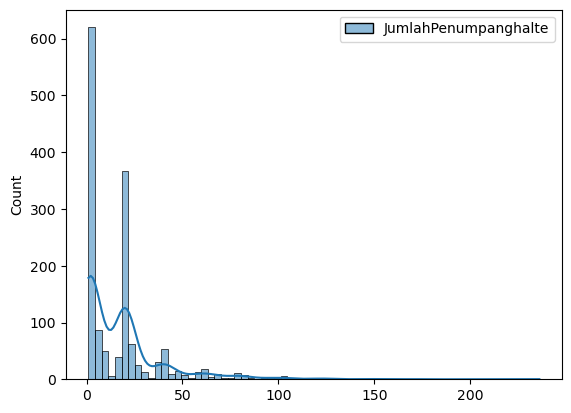

In [335]:
sns.histplot(halte_result.drop(columns=['tapInStopsLat','tapInStopsLon','direction']), kde=True)
plt.show()


pada diagram histogram ini sangat terlihat persebaran penumpang transjakarta sangat tidak terdistribusi tidak normal dan data cenderung skew ke kanan, hal ini menunjukan data terkonsentrasi pada satu daerah saja

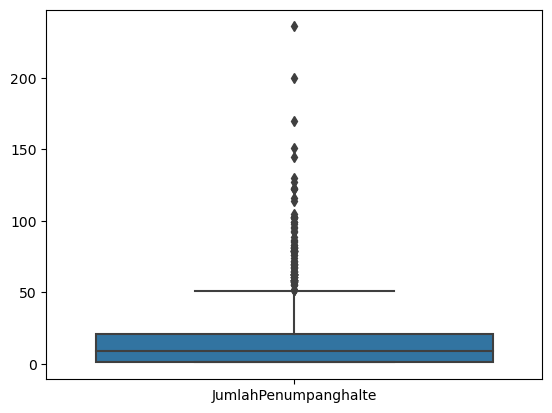

In [151]:
sns.boxplot(halte_result.drop(columns=['tapInStopsLat','tapInStopsLon','direction'])) 
plt.show()

# Melihat tingkat kepadatan penumpang pada setiap corridor Transjakart 

In [101]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [496]:
corridor = df1[df1['direction']==0.000][['direction','corridorName','corridorID','tapInStopsLat','tapInStopsLon','corridorID_misiing']]
#corridor.drop_duplicates()
#corridor.drop_duplicates(subset=['corridorName'], inplace=True)
corridor

direction                              corridorName corridorID  \
1     0.000       Stasiun Tebet - Karet via Patra Kuningan  6C          
2     0.000       Pantai Maju - Kota                        R1A         
3     0.000       Pulo Gebang - Pulo Gadung 2 via PIK       11D         
4     0.000       Tanjung Priok - Pluit                     12          
5     0.000       Cibubur - Balai Kota                      1T          
...     ...                        ...                      ..          
37889 0.000       Kalibata - Kuningan                       JAK.18      
37890 0.000       Grogol - Meruya via Roxy                  JAK.30      
37893 0.000       Rawa Buaya - Rawa Kompeni                 JAK.80      
37894 0.000       Kalimalang - Duren Sawit                  JAK.39      
37899 0.000       Ciledug - Tendean                         13          

       tapInStopsLat  tapInStopsLon  corridorID_misiing  
1     -6.229         106.833         0                   
2     -6.133         106.814         0                   
3     -6.196         106.935         0                   
4     -6.150         106.889         0                   
5     -6.216         106.816         0                   
...      ...             ...        ..                   
37889 -6.249         106.847         0                   
37890 -6.191         106.767         0                   
37893 -6.098         106.702         0                   
37894 -6.239         106.942         0                   
37899 -6.236         106.748         0                   

[18926 rows x 6 columns]

In [500]:
corridor = df1[df1['corridorID_misiing']==1][['direction','corridorName','corridorID','tapInStopsLat','tapInStopsLon','corridorID_misiing']]
#corridor.drop_duplicates()
#corridor.drop_duplicates(subset=['corridorName'], inplace=True)
corridor.tail(20)

direction                                  corridorName corridorID  \
37273 1.000       NaN                                           NaN         
37337 1.000       Cibubur - BKN                                 NaN         
37364 1.000       NaN                                           NaN         
37380 0.000       Kampung Melayu - Pondok Kelapa                NaN         
37410 0.000       NaN                                           NaN         
37439 1.000       NaN                                           NaN         
37440 0.000       NaN                                           NaN         
37457 1.000       NaN                                           NaN         
37493 0.000       NaN                                           NaN         
37504 1.000       NaN                                           NaN         
37574 0.000       NaN                                           NaN         
37584 0.000       NaN                                           NaN         
37594 1.000       NaN                                           NaN         
37598 1.000       NaN                                           NaN         
37626 1.000       NaN                                           NaN         
37689 1.000       NaN                                           NaN         
37727 1.000       NaN                                           NaN         
37770 1.000       NaN                                           NaN         
37797 1.000       Rusun Marunda - Terminal Terpadu Pulo Gebang  NaN         
37838 1.000       NaN                                           NaN         

       tapInStopsLat  tapInStopsLon  corridorID_misiing  
37273 -6.291         106.888         1                   
37337 -6.370         106.896         1                   
37364 -6.206         106.822         1                   
37380 -6.218         106.874         1                   
37410 -6.169         106.974         1                   
37439 -6.215         106.760         1                   
37440 -6.098         106.962         1                   
37457 -6.295         106.904         1                   
37493 -6.238         106.778         1                   
37504 -6.225         106.867         1                   
37574 -6.187         106.835         1                   
37584 -6.258         107.021         1                   
37594 -6.109         106.740         1                   
37598 -6.242         106.880         1                   
37626 -6.141         106.956         1                   
37689 -6.178         106.899         1                   
37727 -6.138         106.818         1                   
37770 -6.137         106.832         1                   
37797 -6.125         106.957         1                   
37838 -6.195         106.944         1

In [411]:
total_passengers_per_stop.sort_values(by=['JumlahPenumpanghalte'], ascending=True,inplace=True)
total_passengers_per_stop

corridorID  JumlahPenumpanghalte
132     JAK.12                    59
176     JAK.53                   121
195     JAK.99                   166
48          2Q                   234
84          7B                   247
..         ...                   ...
85          7C                 10790
40          1T                 10919
16          12                 13022
52          3C                 14884
105         9N                 20200

[221 rows x 2 columns]

In [108]:
corridor_result = total_passengers_per_stop.join(corridor.set_index('corridorID'), on='corridorID', rsuffix='_corridor').drop_duplicates()
corridor_result.drop_duplicates().isna()

corridorID  JumlahPenumpanghalte  direction  corridorName  tapInStopsLat  \
132       False                 False      False         False          False   
176       False                 False      False         False          False   
195       False                 False      False         False          False   
48        False                 False      False         False          False   
84        False                 False      False         False          False   
..          ...                   ...        ...           ...            ...   
85        False                 False      False         False          False   
40        False                 False      False         False          False   
16        False                 False      False         False          False   
52        False                 False      False         False          False   
105       False                 False      False         False          False   

     tapInStopsLon  
132          False  
176          False  
195          False  
48           False  
84           False  
..             ...  
85           False  
40           False  
16           False  
52           False  
105          False  

[222 rows x 6 columns]

In [410]:
corridor_result.dropna(inplace=True)
corridor_result
corridor_result= corridor_result.rename(columns={'JumlahPenumpanghalte': 'Jumlah_penumpang_per_corridor'})
corridor_result.drop_duplicates(inplace=True)
corridor_result
#corridor_result.to_csv('corridor_result_driection_0_GO.csv', index=False)

corridorID  Jumlah_penumpang_per_corridor  direction  \
132     JAK.12                             59      0.000   
176     JAK.53                            121      0.000   
195     JAK.99                            166      0.000   
48          2Q                            234      0.000   
84          7B                            247      0.000   
..         ...                            ...        ...   
85          7C                          10790      0.000   
40          1T                          10919      0.000   
16          12                          13022      0.000   
52          3C                          14884      0.000   
105         9N                          20200      0.000   

                                       corridorName  tapInStopsLat  \
132  Tanah Abang - Kebayoran Lama via Pos Pengumben         -6.221   
176                Grogol - Pos Pengumben via Slipi         -6.185   
195                     Term. Pulo Gadung - Lampiri         -6.219   
48                          Gondangdia - Balai Kota         -6.182   
84                        Kampung Rambutan - Blok M         -6.271   
..                                              ...            ...   
85                                    Cibubur - BKN         -6.369   
40                             Cibubur - Balai Kota         -6.216   
16                            Tanjung Priok - Pluit         -6.150   
52                  Rusun Kapuk Muara - Penjaringan         -6.136   
105                          Pinang Ranti - Pramuka         -6.290   

     tapInStopsLon  
132        106.772  
176        106.790  
195        106.924  
48         106.833  
84         106.867  
..             ...  
85         106.894  
40         106.816  
16         106.889  
52         106.763  
105        106.881  

[216 rows x 6 columns]

In [117]:
corridor_result.describe()

Jumlah_penumpang_per_corridor  direction  tapInStopsLat  tapInStopsLon
count                        216.000    216.000        216.000        216.000
mean                        3125.060      0.000         -6.216        106.843
std                         2697.848      0.000          0.059          0.060
min                           59.000      0.000         -6.387        106.674
25%                         1267.500      0.000         -6.247        106.806
50%                         2431.000      0.000         -6.215        106.841
75%                         4131.500      0.000         -6.175        106.883
max                        20200.000      0.000         -6.092        107.017

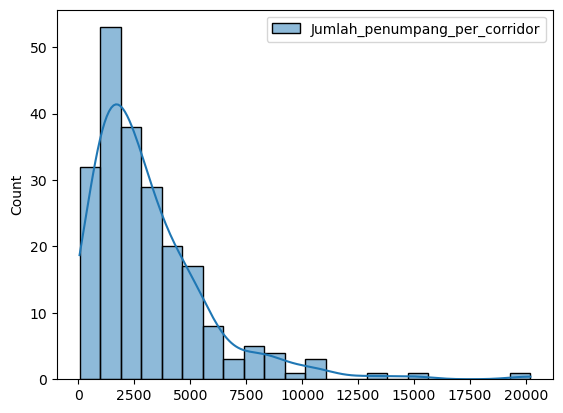

In [111]:
sns.histplot(corridor_result.drop(columns=['corridorID','direction','tapInStopsLat','tapInStopsLon']), kde=True)
plt.show()

pada diagram histogram ini sangat terlihat persebaran penumpang pada corridor transjakarta sangat tidak terdistribusi tidak normal dan data cenderung skew ke kanan, hal ini menunjukan data terkonsentrasi pada satu daerah saja

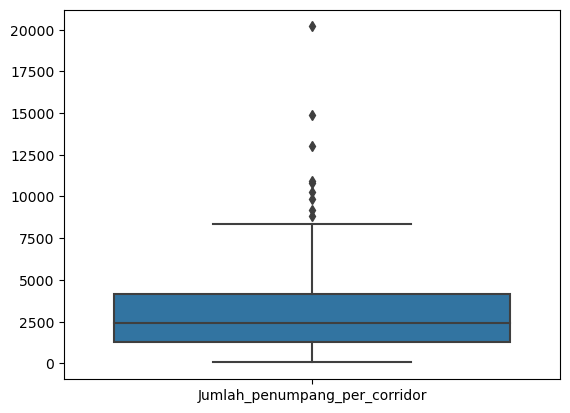

In [112]:
sns.boxplot(corridor_result.drop(columns=['tapInStopsLat','tapInStopsLon','direction']))
plt.show()

In [ ]:
import folium

# Membuat peta dengan lokasi awal berdasarkan data pertama
mymap_corridor = folium.Map(location=[halte['tapInStopsLat'].iloc[0], halte['tapInStopsLon'].iloc[0]], zoom_start=13)

# Menghitung nilai maksimum jumlah penumpang untuk normalisasi warna
max_count = halte_result['JumlahPenumpanghalte'].max()

# Menambahkan marker untuk setiap baris dalam DataFrame
for index, row in halte_result.iterrows():
    # Menghitung nilai opasitas berdasarkan jumlah penumpang
    opacity = row['JumlahPenumpanghalte'] / max_count
    
    # Menghitung warna berdasarkan tingkat kepadatan
    if row['JumlahPenumpanghalte'] < 10: 
        color_intensity = int(255 * (1 - opacity))
        color = f'#{color_intensity:02x}{color_intensity:02x}FF'  # Putih dengan tingkat kecerahan yang berbeda
    
    # Menggunakan marker berbentuk lingkaran dengan warna dan opasitas yang berbeda
        folium.CircleMarker(
            location=[row['tapInStopsLat'], row['tapInStopsLon']],
            radius=10,  # Ukuran marker tetap, sesuaikan sesuai kebutuhan
            popup=f"Stop: {row['tapInStopsName_halte']}\nJumlah Penumpang: {row['JumlahPenumpanghalte']}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity
        ).add_to(mymap)

# Menampilkan peta
mymap

# Persebaran penumpang Trnasjakarta pada setiap haltenya dari arah 1 atau arah sebaliknya

In [154]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [155]:
halte_1 = df1[df1['direction']==1.000][['tapInStops','tapInStopsName','tapInStopsLat','tapInStopsLon','direction']]
halte_1

tapInStops            tapInStopsName  tapInStopsLat  tapInStopsLon  \
0         P00142                 Pal Putih         -6.185        106.844   
7        B03416P        SDN Pondok Labu 11         -6.313        106.802   
8        B00795P                  Imperium         -6.210        106.831   
10       B05433P          Pegangsaan Timur         -6.199        106.842   
11        P00254                   Tendean         -6.240        106.831   
...          ...                       ...            ...            ...   
37892    B01087P  Jln. Gunung Galunggung 1         -6.142        106.737   
37895     P00261                    Tosari         -6.197        106.823   
37896     P00064         Garuda Taman Mini         -6.290        106.881   
37897    B02873P             Plaza Sentral         -6.216        106.817   
37898    B02505P            Museum Textile         -6.189        106.810   

       direction  
0          1.000  
7          1.000  
8          1.000  
10         1.000  
11         1.000  
...          ...  
37892      1.000  
37895      1.000  
37896      1.000  
37897      1.000  
37898      1.000  

[18974 rows x 5 columns]

In [156]:
halte_1_jumlah_penumpang = df1.groupby('tapInStops')['tapInStopsName'].count().reset_index()
halte_1_jumlah_penumpang

tapInStops  tapInStopsName
0       B00001P              19
1       B00004P               1
2       B00005P               6
3       B00008P               1
4       B00017P               3
...         ...             ...
2565     P00294              20
2566     P00295              23
2567     P00296               3
2568     P00297             151
2569     P00298               1

[2570 rows x 2 columns]

In [157]:
halte_1_result = halte_1_jumlah_penumpang.join(halte_1.set_index('tapInStops'), on='tapInStops', rsuffix='_halte_1').drop_duplicates()
halte_1_result

tapInStops  tapInStopsName       tapInStopsName_halte_1  tapInStopsLat  \
0       B00001P              19               18 Office Park         -6.299   
1       B00004P               1               ACC Simatupang         -6.304   
2       B00005P               6                 ACE Hardware         -6.388   
3       B00008P               1                          NaN            NaN   
4       B00017P               3  Akper Fatmawati Pondok Labu         -6.313   
...         ...             ...                          ...            ...   
2565     P00294              20     Sawah Besar Arah Selatan         -6.157   
2566     P00295              23      Mangga Besar Arah Utara         -6.153   
2567     P00296               3    Mangga Besar Arah Selatan         -6.154   
2568     P00297             151                      BNN LRT         -6.246   
2569     P00298               1                 Dukuh Atas 2         -6.204   

      tapInStopsLon  direction  
0           106.832      1.000  
1           106.849      1.000  
2           106.827      1.000  
3               NaN        NaN  
4           106.799      1.000  
...             ...        ...  
2565        106.819      1.000  
2566        106.818      1.000  
2567        106.818      1.000  
2568        106.871      1.000  
2569        106.823      1.000  

[2570 rows x 6 columns]

In [158]:
halte_1_result = halte_1_result.rename(columns={'tapInStopsName': 'JumlahPenumpanghalte_1'})
halte_1_result

tapInStops  JumlahPenumpanghalte_1       tapInStopsName_halte_1  \
0       B00001P                      19               18 Office Park   
1       B00004P                       1               ACC Simatupang   
2       B00005P                       6                 ACE Hardware   
3       B00008P                       1                          NaN   
4       B00017P                       3  Akper Fatmawati Pondok Labu   
...         ...                     ...                          ...   
2565     P00294                      20     Sawah Besar Arah Selatan   
2566     P00295                      23      Mangga Besar Arah Utara   
2567     P00296                       3    Mangga Besar Arah Selatan   
2568     P00297                     151                      BNN LRT   
2569     P00298                       1                 Dukuh Atas 2   

      tapInStopsLat  tapInStopsLon  direction  
0            -6.299        106.832      1.000  
1            -6.304        106.849      1.000  
2            -6.388        106.827      1.000  
3               NaN            NaN        NaN  
4            -6.313        106.799      1.000  
...             ...            ...        ...  
2565         -6.157        106.819      1.000  
2566         -6.153        106.818      1.000  
2567         -6.154        106.818      1.000  
2568         -6.246        106.871      1.000  
2569         -6.204        106.823      1.000  

[2570 rows x 6 columns]

In [159]:
halte_1_result.sort_values(by=['tapInStopsName_halte_1'], ascending=True,inplace=True)
halte_1_result.isna()

tapInStops  JumlahPenumpanghalte_1  tapInStopsName_halte_1  \
0          False                   False                   False   
1          False                   False                   False   
2          False                   False                   False   
2318       False                   False                   False   
2314       False                   False                   False   
...          ...                     ...                     ...   
2542       False                   False                    True   
2547       False                   False                    True   
2559       False                   False                    True   
2560       False                   False                    True   
2564       False                   False                    True   

      tapInStopsLat  tapInStopsLon  direction  
0             False          False      False  
1             False          False      False  
2             False          False      False  
2318          False          False      False  
2314          False          False      False  
...             ...            ...        ...  
2542           True           True       True  
2547           True           True       True  
2559           True           True       True  
2560           True           True       True  
2564           True           True       True  

[2570 rows x 6 columns]

In [392]:
halte_1_result.dropna(inplace=True)
halte_1_result.drop_duplicates()
halte_1_result
halte_1_result.to_csv('data_halte_direction_1.csv', index=False)

In [339]:
import folium

# Membuat peta dengan lokasi awal berdasarkan data pertama
mymap_1 = folium.Map(location=[halte_1['tapInStopsLat'].iloc[0], halte_1['tapInStopsLon'].iloc[0]], zoom_start=13)

# Menghitung nilai maksimum jumlah penumpang untuk normalisasi warna
max_count = halte_1_result['JumlahPenumpanghalte_1'].max()

# Menambahkan marker untuk setiap baris dalam DataFrame
for index, row in halte_1_result.iterrows():
    # Menghitung nilai opasitas berdasarkan jumlah penumpang
    opacity = row['JumlahPenumpanghalte_1'] / max_count
    
    # Menghitung warna berdasarkan tingkat kepadatan
    if row['JumlahPenumpanghalte_1'] < 40: 
        color_intensity = int(255 * (1 - opacity))
        color = f'#{color_intensity:02x}{color_intensity:02x}FF'  # Putih dengan tingkat kecerahan yang berbeda
    
    # Menggunakan marker berbentuk lingkaran dengan warna dan opasitas yang berbeda
    folium.CircleMarker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        radius=7,  # Ukuran marker tetap, sesuaikan sesuai kebutuhan
        popup=f"Stop: {row['tapInStopsName_halte_1']}\nJumlah Penumpang: {row['JumlahPenumpanghalte_1']}",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=opacity
    ).add_to(mymap_1)

# Menampilkan peta
mymap_1



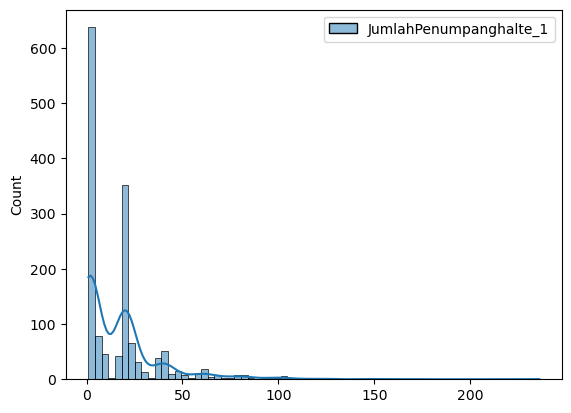

In [170]:
sns.histplot(halte_1_result.drop(columns=['tapInStopsLat','tapInStopsLon','direction']), kde=True)
plt.show()

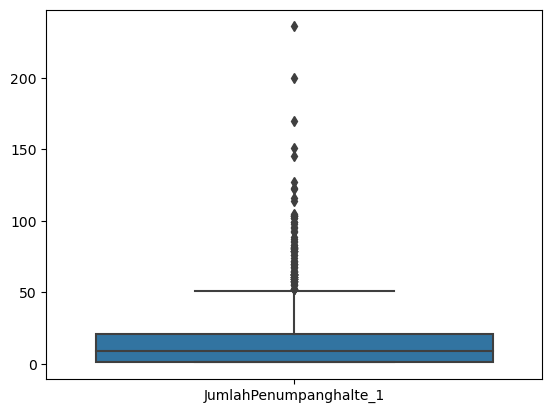

In [171]:
sns.boxplot(halte_1_result.drop(columns=['tapInStopsLat','tapInStopsLon','direction']))
plt.show()

Dari semua diagram menunjukan bahwa tingkat kepadatan kembali tersebar di titik titk tertentu dan membuat 
di beberapa halte atau corridor menagalami kepadatan penumpang, sehingga akan membuat ketidaknyamanan bagai 
penumpang transjakarta

# Mennganalisis persebaran pemberhentian penumpang pada masing masing halte

In [352]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [359]:
halte_out = df1[['tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','corridorID','corridorName']]
halte_out

tapOutStops        tapOutStopsName  tapOutStopsLat  tapOutStopsLon  \
0          P00253                Tegalan          -6.203         106.857   
1         B03307P    Sampoerna Strategic          -6.217         106.819   
2         B04962P  Simpang Kunir Kemukus          -6.134         106.815   
3         B03090P      Raya Penggilingan          -6.183         106.932   
4          P00098       Kali Besar Barat          -6.135         106.811   
...           ...                    ...             ...             ...   
37895      P00228                 SMK 57          -6.291         106.824   
37896      P00179           Pinang Ranti          -6.291         106.886   
37897     B00226P        Buperta Cibubur          -6.370         106.896   
37898     B01787P             JPO Blok G          -6.189         106.811   
37899      P00106         Kebayoran Lama          -6.238         106.778   

      corridorID                              corridorName  
0              5                     Matraman Baru - Ancol  
1             6C  Stasiun Tebet - Karet via Patra Kuningan  
2            R1A                        Pantai Maju - Kota  
3            11D       Pulo Gebang - Pulo Gadung 2 via PIK  
4             12                     Tanjung Priok - Pluit  
...          ...                                       ...  
37895         6B         Ragunan - MH Thamrin via Semanggi  
37896         9N                    Pinang Ranti - Pramuka  
37897         1T                      Cibubur - Balai Kota  
37898     JAK.13               Tanah Abang - Jembatan Lima  
37899         13                         Ciledug - Tendean  

[37900 rows x 6 columns]

In [360]:
halte_out_1 = df1.groupby('tapOutStops')['tapOutStopsName'].count().reset_index()
halte_out_1.head(10)

tapOutStops  tapOutStopsName
0     B00002P                2
1     B00003P                1
2     B00004P                1
3     B00005P                1
4     B00013P                1
5     B00015P                1
6     B00022P               21
7     B00028P                7
8     B00029P                1
9     B00030P                1

In [361]:
halte_out_1_result = halte_out_1.join(halte_out.set_index('tapOutStops'), on='tapOutStops', rsuffix='_halte_out').drop_duplicates()
halte_out_1_result.head(10)

tapOutStops  tapOutStopsName            tapOutStopsName_halte_out  \
0     B00002P                2                                  ABA   
1     B00003P                1                     Acacia Residence   
2     B00004P                1                       ACC Simatupang   
3     B00005P                1                         ACE Hardware   
4     B00013P                1             Ahmad Yani Pisangan Baru   
5     B00015P                1            Akademi Farmasi Mahadhika   
6     B00022P               21  Akses Jembatan Ciliwung Balekambang   
6     B00022P               21  Akses Jembatan Ciliwung Balekambang   
7     B00028P                7                  Al Khairiyah School   
8     B00029P                1                        Al Mahbubiyah   

   tapOutStopsLat  tapOutStopsLon corridorID  \
0          -6.194         106.839         6H   
1          -6.263         106.757         8E   
2          -6.304         106.849        D21   
3          -6.388         106.827        D11   
4          -6.211         106.874     JAK.86   
5          -6.313         106.869     JAK.72   
6          -6.284         106.849     JAK.37   
6          -6.284         106.849     JAK.16   
7          -6.237         106.918     JAK.85   
8          -6.292         106.813         6T   

                               corridorName  
0                       Senen - Lebak Bulus  
1                          Bintaro - Blok M  
2       Universitas Indonesia - Lebak Bulus  
3                               Depok - BKN  
4        Term. Rawamangun - Term. Manggarai  
5  Kampung Rambutan - Pasar Rebo via Poncol  
6         Cililitan - Condet via Kayu Manis  
6                        Cililitan - Condet  
7                  Bintara - Cipinang Indah  
8                     Pasar Minggu - Velbak

In [362]:
halte_out_1_result = halte_out_1_result.rename(columns={'tapOutStopsName': 'JumlahPenumpangout'})

In [393]:
halte_out_1_result
halte_out_1_result.drop_duplicates(subset=['tapOutStopsName_halte_out'], inplace=True)
halte_out_1_result
halte_out_1_result.to_csv('data_halte_tapout.csv', index=False)

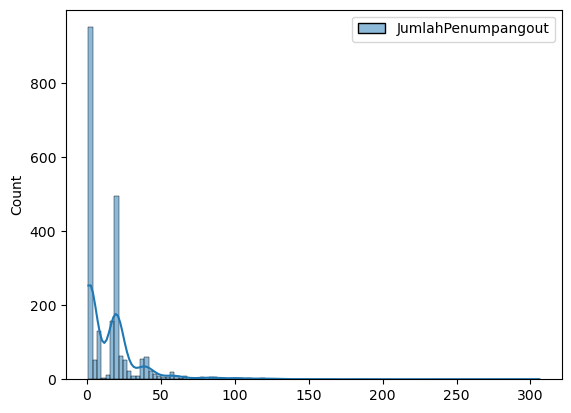

In [358]:
sns.histplot(halte_out_1_result.drop(columns=['tapOutStopsLat','tapOutStopsLon']), kde=True)
plt.show()

Pada diagram Histogram ini terlihat bahwa data cenderung skew ke kanan yang artinya data tidak terdistribusi normal
yang membuat data terkonsentrasi pada satu tempat saja.

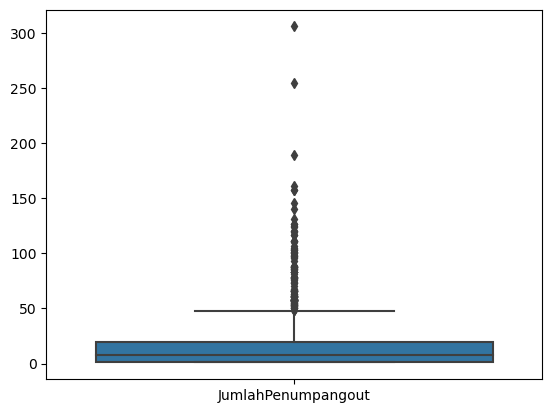

In [204]:
sns.boxplot(halte_out_1_result.drop(columns=['tapOutStopsLat','tapOutStopsLon']))
plt.show()

dan kemudian pada diagram box plot ini data terlihat banyak sekali otlier yang menunjukan data penumpang tidak
tersebar secara normal.

In [207]:
import folium

# Membuat peta dengan lokasi awal berdasarkan data pertama
mymap_3 = folium.Map(location=[halte_out['tapOutStopsLat'].iloc[0], halte_out['tapOutStopsLon'].iloc[0]], zoom_start=13)

# Menghitung nilai maksimum jumlah penumpang untuk normalisasi warna
max_count = halte_out_1_result['JumlahPenumpangout'].max()

# Menambahkan marker untuk setiap baris dalam DataFrame
for index, row in halte_out_1_result.iterrows():
    # Menghitung nilai opasitas berdasarkan jumlah penumpang
    opacity = row['JumlahPenumpangout'] / max_count
    
    # Jika jumlah penumpang lebih besar dari 0, tambahkan marker
    if row['JumlahPenumpangout'] > 50:
        # Menghitung warna berdasarkan tingkat kepadatan
        color_intensity = int(255 * (1 - opacity))
        color = f'#{color_intensity:02x}{color_intensity:02x}FF'  # Putih dengan tingkat kecerahan yang berbeda
        
        # Menggunakan marker berbentuk lingkaran dengan warna dan opasitas yang berbeda
        folium.CircleMarker(
            location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
            radius=8,  # Ukuran marker tetap, sesuaikan sesuai kebutuhan
            popup=f"Stop: {row['tapOutStopsName_halte_out']}\nJumlah Penumpang: {row['JumlahPenumpangout']}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=opacity
        ).add_to(mymap_3)

# Menampilkan peta
mymap_3


pada diagram ini menunjukan dimanasaja persebaran penumpang transjakarta itu stop out atau berhenti pada tujuannya
disini terlihat kembali pola persebarannya kembali terkonsetrasi antara jakarta bagian selatan dan jakarta pusat 
penumpang terkonsentrasi di daerah tersebut hal ini memungkinkan menimbulkan kepadatan dan kemacetan pada jalur dan
halte daerah tersebut.

# Menganalisis persebaran penumpang Transjakarta berdasarkan waktu

In [209]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [210]:
df1

transID            payCardID payCardBank  \
0      EIIW227B8L34VB      180062659848800      emoney   
1      LGXO740D2N47GZ     4885331907664776         dki   
2      DJWR385V2U57TO     4996225095064169         dki   
3      JTUZ800U7C86EH         639099174703       flazz   
4      VMLO535V7F95NJ         570928206772       flazz   
...               ...                  ...         ...   
37895  ZWEC949B8Q87QG  4685818286724028395      brizzi   
37896  YHHK837P6Y95GN     6502902290603767         dki   
37897  YXPP627N4G95HO      213159426675861      emoney   
37898  RGVK175U2U98UV      377840859133591      emoney   
37899  FMZZ963S4B68ZP         501862539795       flazz   

                  payCardName payCardSex  payCardBirthDate corridorID  \
0              Bajragin Usada          M              2008          5   
1                Gandi Widodo          F              1997         6C   
2               Emong Wastuti          F              1992        R1A   
3                Surya Wacana          F              1978        11D   
4             Embuh Mardhiyah          M              1982         12   
...                       ...        ...               ...        ...   
37895         Kamila Mahendra          F              2004         6B   
37896            Titi Siregar          M              1974         9N   
37897  drg. Zahra Nashiruddin          F              1976         1T   
37898            Ana Agustina          M              1976     JAK.13   
37899       drg. Leo Najmudin          F              1985         13   

                                   corridorName  direction tapInStops  ...  \
0                         Matraman Baru - Ancol      1.000     P00142  ...   
1      Stasiun Tebet - Karet via Patra Kuningan      0.000    B01963P  ...   
2                            Pantai Maju - Kota      0.000    B00499P  ...   
3           Pulo Gebang - Pulo Gadung 2 via PIK      0.000    B05587P  ...   
4                         Tanjung Priok - Pluit      0.000     P00239  ...   
...                                         ...        ...        ...  ...   
37895         Ragunan - MH Thamrin via Semanggi      1.000     P00261  ...   
37896                    Pinang Ranti - Pramuka      1.000     P00064  ...   
37897                      Cibubur - Balai Kota      1.000    B02873P  ...   
37898               Tanah Abang - Jembatan Lima      1.000    B02505P  ...   
37899                         Ciledug - Tendean      0.000     P00001  ...   

      tapInStopsLon  stopStartSeq            tapInTime  tapOutStops  \
0           106.844             7  2023-04-03 05:21:44       P00253   
1           106.833            13  2023-04-03 05:42:44      B03307P   
2           106.814            38  2023-04-03 05:59:06      B04962P   
3           106.935            23  2023-04-03 05:44:51      B03090P   
4           106.889             5  2023-04-03 06:17:35       P00098   
...             ...           ...                  ...          ...   
37895       106.823             2  2023-04-21 18:18:37       P00228   
37896       106.881             1  2023-04-18 21:52:31       P00179   
37897       106.817            12  2023-04-04 10:29:47      B00226P   
37898       106.810            33  2023-04-15 19:59:26      B01787P   
37899       106.748             2  2023-04-12 21:08:12       P00106   

             tapOutStopsName tapOutStopsLat tapOutStopsLon  stopEndSeq  \
0                    Tegalan         -6.203        106.857      12.000   
1        Sampoerna Strategic         -6.217        106.819      21.000   
2      Simpang Kunir Kemukus         -6.134        106.815      39.000   
3          Raya Penggilingan         -6.183        106.932      29.000   
4           Kali Besar Barat         -6.135        106.811      15.000   
...                      ...            ...            ...         ...   
37895                 SMK 57         -6.291        106.824      13.000   
37896           Pinang Ranti         -6.291        106.886

In [404]:
time_1 = df1[df1['direction']==0.000][['tapInStops','tapInStopsName','tapInStopsLat','tapInStopsLon','direction','tapInTime']]
time_1

tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  \
1        B01963P              Kemenkes 2         -6.229        106.833   
2        B00499P            Gg. Kunir II         -6.133        106.814   
3        B05587P            Taman Elok 1         -6.196        106.935   
4         P00239  Sunter Boulevard Barat         -6.150        106.889   
5        B00127P                Benhil 3         -6.216        106.816   
...          ...                     ...            ...            ...   
37888    B00664P          GOR Sumantri 2         -6.221        106.832   
37890    B00018P               AKR Tower         -6.191        106.767   
37893    B02485P                 MTsN 37         -6.098        106.702   
37894    B04489P           Sbr. SMPN 252         -6.239        106.942   
37899     P00001              Adam Malik         -6.236        106.748   

       direction            tapInTime  
1          0.000  2023-04-03 05:42:44  
2          0.000  2023-04-03 05:59:06  
3          0.000  2023-04-03 05:44:51  
4          0.000  2023-04-03 06:17:35  
5          0.000  2023-04-03 05:08:01  
...          ...                  ...  
37888      0.000  2023-04-05 09:30:00  
37890      0.000  2023-04-30 14:45:49  
37893      0.000  2023-04-19 08:16:10  
37894      0.000  2023-04-14 11:36:12  
37899      0.000  2023-04-12 21:08:12  

[15849 rows x 6 columns]

In [395]:
time_jml = df1.groupby('tapInStops')['tapInTime'].count().reset_index()
time_jml

tapInStops  tapInTime
0       B00001P         17
1       B00004P          1
2       B00005P          5
3       B00008P          1
4       B00017P          3
...         ...        ...
2424     P00293         39
2425     P00295         19
2426     P00296          2
2427     P00297        139
2428     P00298          1

[2429 rows x 2 columns]

In [396]:
time_result = time_jml.join(time_1.set_index('tapInStops'), on='tapInStops', rsuffix='_time_1').drop_duplicates()
time_result

tapInStops  tapInTime  tapInStopsName  tapInStopsLat  tapInStopsLon  \
0       B00001P         17  18 Office Park         -6.299        106.832   
0       B00001P         17  18 Office Park         -6.299        106.832   
0       B00001P         17  18 Office Park         -6.299        106.832   
0       B00001P         17  18 Office Park         -6.299        106.832   
0       B00001P         17  18 Office Park         -6.299        106.832   
...         ...        ...             ...            ...            ...   
2427     P00297        139         BNN LRT         -6.246        106.871   
2427     P00297        139         BNN LRT         -6.246        106.871   
2427     P00297        139         BNN LRT         -6.246        106.871   
2427     P00297        139         BNN LRT         -6.246        106.871   
2428     P00298          1    Dukuh Atas 2         -6.204        106.823   

      direction     tapInTime_time_1  
0         1.000  2023-04-04 05:29:20  
0         1.000  2023-04-05 06:49:10  
0         1.000  2023-04-06 06:03:49  
0         1.000  2023-04-07 06:31:21  
0         1.000  2023-04-10 06:05:10  
...         ...                  ...  
2427      1.000  2023-04-23 07:27:29  
2427      1.000  2023-04-29 17:08:24  
2427      1.000  2023-04-30 06:14:22  
2427      1.000  2023-04-30 07:18:59  
2428      1.000  2023-04-15 06:55:23  

[16917 rows x 7 columns]

In [397]:
time=df1[['tapInTime',]]
time

tapInTime
0      2023-04-03 05:21:44
1      2023-04-03 05:42:44
2      2023-04-03 05:59:06
3      2023-04-03 05:44:51
4      2023-04-03 06:17:35
...                    ...
37895  2023-04-21 18:18:37
37896  2023-04-18 21:52:31
37897  2023-04-04 10:29:47
37898  2023-04-15 19:59:26
37899  2023-04-12 21:08:12

[31730 rows x 1 columns]

In [408]:
time_1['tapInTime'] = pd.to_datetime(time['tapInTime'])
time_1


tapInStops          tapInStopsName  tapInStopsLat  tapInStopsLon  \
1        B01963P              Kemenkes 2         -6.229        106.833   
2        B00499P            Gg. Kunir II         -6.133        106.814   
3        B05587P            Taman Elok 1         -6.196        106.935   
4         P00239  Sunter Boulevard Barat         -6.150        106.889   
5        B00127P                Benhil 3         -6.216        106.816   
...          ...                     ...            ...            ...   
37888    B00664P          GOR Sumantri 2         -6.221        106.832   
37890    B00018P               AKR Tower         -6.191        106.767   
37893    B02485P                 MTsN 37         -6.098        106.702   
37894    B04489P           Sbr. SMPN 252         -6.239        106.942   
37899     P00001              Adam Malik         -6.236        106.748   

       direction           tapInTime  
1          0.000 2023-04-03 05:42:44  
2          0.000 2023-04-03 05:59:06  
3          0.000 2023-04-03 05:44:51  
4          0.000 2023-04-03 06:17:35  
5          0.000 2023-04-03 05:08:01  
...          ...                 ...  
37888      0.000 2023-04-05 09:30:00  
37890      0.000 2023-04-30 14:45:49  
37893      0.000 2023-04-19 08:16:10  
37894      0.000 2023-04-14 11:36:12  
37899      0.000 2023-04-12 21:08:12  

[15849 rows x 6 columns]

In [407]:
start_time = pd.to_datetime('05:00:00').time()
end_time = pd.to_datetime('23:00:00').time()

In [409]:
time1 = time_1[(time_1['tapInTime'].dt.time >= start_time) & (time_1['tapInTime'].dt.time <= end_time)]
time1
time_1.to_csv('data_waktu_0_05:00-23:00.csv', index=False)

In [ ]:
time_jml = df1.groupby('tapInStops')['tapInStopsName'].count().reset_index()
time_jml

In [373]:
halte_1_jumlah_penumpang_05 = df1.groupby('tapInStops')['tapInTime'].count().reset_index()
halte_1_jumlah_penumpang_05

tapInStops  tapInTime
0       B00001P         19
1       B00004P          1
2       B00005P          6
3       B00008P          1
4       B00017P          3
...         ...        ...
2565     P00294         20
2566     P00295         23
2567     P00296          3
2568     P00297        151
2569     P00298          1

[2570 rows x 2 columns]

In [317]:
total_passengers_per_stop_05 = halte_1_result_05.groupby('tapInStops')['tapInStopsName'].sum().reset_index()
print(total_passengers_per_stop_05)


    tapInStops  tapInStopsName
0      B00027P              19
1      B00028P              19
2      B00036P              20
3      B00040P              20
4      B00066P               8
..         ...             ...
389     P00268              43
390     P00269             103
391     P00270              79
392     P00285               2
393     P00293              40

[394 rows x 2 columns]


In [375]:
halte_1_result_05 = time_jml.join(time1.set_index('tapInStops'), on='tapInStops', rsuffix='_halte_1').drop_duplicates()
halte_1_result_05.tail(10)

tapInStops  tapInTime           tapInStopsName  tapInStopsLat  \
2564     P00293         40   Sawah Besar Arah Utara         -6.157   
2564     P00293         40   Sawah Besar Arah Utara         -6.157   
2564     P00293         40   Sawah Besar Arah Utara         -6.157   
2564     P00293         40   Sawah Besar Arah Utara         -6.157   
2564     P00293         40   Sawah Besar Arah Utara         -6.157   
2565     P00294         20                      NaN            NaN   
2566     P00295         23  Mangga Besar Arah Utara         -6.153   
2567     P00296          3                      NaN            NaN   
2568     P00297        151                      NaN            NaN   
2569     P00298          1                      NaN            NaN   

      tapInStopsLon  direction   tapInTime_halte_1  
2564        106.818      0.000 2023-04-14 06:13:26  
2564        106.818      0.000 2023-04-19 07:50:31  
2564        106.818      0.000 2023-04-25 06:54:23  
2564        106.818      0.000 2023-04-26 07:04:07  
2564        106.818      0.000 2023-04-28 06:11:03  
2565            NaN        NaN                 NaT  
2566        106.818      0.000 2023-04-16 05:26:13  
2567            NaN        NaN                 NaT  
2568            NaN        NaN                 NaT  
2569            NaN        NaN                 NaT

In [326]:
halte_1_result_05.isna()

tapInStops  tapInStopsName  tapInStopsName_halte_1  tapInStopsLat  \
0          False           False                    True           True   
1          False           False                    True           True   
2          False           False                    True           True   
3          False           False                    True           True   
4          False           False                    True           True   
...          ...             ...                     ...            ...   
2565       False           False                    True           True   
2566       False           False                    True           True   
2567       False           False                    True           True   
2568       False           False                    True           True   
2569       False           False                    True           True   

      tapInStopsLon  direction  tapInTime  
0              True       True       True  
1              True       True       True  
2              True       True       True  
3              True       True       True  
4              True       True       True  
...             ...        ...        ...  
2565           True       True       True  
2566           True       True       True  
2567           True       True       True  
2568           True       True       True  
2569           True       True       True  

[2592 rows x 7 columns]

In [327]:
halte_1_result_05.dropna(inplace=True)
halte_1_result_05.drop_duplicates(subset=['tapInStopsName_halte_1'], inplace=True)
halte_1_result_05

tapInStops  tapInStopsName tapInStopsName_halte_1  tapInStopsLat  \
28      B00064P               8       Ariobimo Sentral         -6.227   
30      B00066P               8    Arsip Nasional RI 1         -6.279   
43      B00102P              68           Balai Kota 1         -6.181   
72      B00148P              67        Bintaro Xchange         -6.287   
92      B00191P               9                  BSI 2         -6.238   
...         ...             ...                    ...            ...   
2517     P00230              27           St. Palmerah         -6.209   
2540     P00255               2        Terminal Bekasi         -6.250   
2543     P00259              85              Tirtayasa         -6.239   
2545     P00261             102                 Tosari         -6.197   
2553     P00273              55            Warung Jati         -6.262   

      tapInStopsLon  direction           tapInTime  
28          106.833      0.000 2023-04-17 10:59:14  
30          106.820      0.000 2023-04-14 10:09:25  
43          106.828      0.000 2023-04-14 10:16:42  
72          106.729      0.000 2023-04-29 10:23:31  
92          106.763      0.000 2023-04-19 10:02:19  
...             ...        ...                 ...  
2517        106.797      0.000 2023-04-18 10:09:27  
2540        107.013      0.000 2023-04-07 10:57:48  
2543        106.808      0.000 2023-04-15 10:34:29  
2545        106.823      0.000 2023-04-15 10:40:27  
2553        106.830      0.000 2023-04-15 10:48:33  

[135 rows x 7 columns]

In [328]:
halte_1_result_05.to_csv('output_file10.csv', index=False)